# WSU size of computing estimate numbers (Plots for Crystal)

The goal here is to put together some numbers on the type of projects ALMA would process as part of the WSU to be used to produce a total size of computing estimate.

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import re
import math
from astropy.table import Table, QTable, vstack
from importlib import reload
import wsu_plots

## Read in  WSU estimates from cycle 7 and 8 data

In [3]:
#result = Table.read('cycle7wsu_20220923.fits')
#result_c8 = Table.read('cycle8wsu_20220923.fits')
#result = Table.read('cycle7wsu_20221003.fits')
#result_c8 = Table.read('cycle8wsu_20221003.fits')
#result = Table.read('cycle7wsu_20230321.ecsv')
#result_c8 = Table.read('cycle8wsu_20230321.ecsv')
result = Table.read('data/cycle7wsu_20230420.ecsv')
result_c8 = Table.read('data/cycle8wsu_20230420.ecsv')

In [4]:
result.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','nant_typical','nant_array','nant_all','band','ntarget','target_name','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all')>

In [5]:
len(result)

11519

In [6]:
result_c7_c8 = vstack([result,result_c8])

In [7]:
len(result_c7_c8)

22362

In [9]:
# read in original data for cycle 7 and 8 -- this hasn't been updated since my last archive pull,
# so the date is okay here. The cyberattack broke the astroquery package's ability to query the 
# alma archive.
cycle7tab = Table.read('data/result_table_cycle7_with_calc_values_20220923.csv')
cycle8tab = Table.read('data/result_table_cycle8_with_calc_values_20220923.csv')

In [10]:
np.unique(cycle7tab['array'])

12m
7m
TP


In [11]:
tmp_tab = vstack([cycle7tab,cycle8tab])

In [12]:
len(tmp_tab)

101475

In [13]:
# exclude total power projects
idx = tmp_tab['array'] != ['TP']
cycle7_cycle8_tab = tmp_tab[idx]

In [14]:
len(cycle7_cycle8_tab)

96277

In [15]:
cycle7_cycle8_tab.columns

<TableColumns names=('obs_publisher_did','facility_name','instrument_name','obs_id','dataproduct_type','calib_level','target_name','s_ra','s_dec','s_fov','s_resolution','t_min','t_max','t_exptime','t_resolution','em_min','em_max','em_res_power','pol_states','o_ucd','access_url','access_format','proposal_id','data_rights','gal_longitude','gal_latitude','band_list','em_resolution','bandwidth','antenna_arrays','is_mosaic','spatial_resolution','frequency_support','frequency','velocity_resolution','publication_year','proposal_abstract','schedblock_name','sensitivity_10kms','cont_sensitivity_bandwidth','pwv','group_ous_uid','member_ous_uid','asdm_uid','type','scan_intent','science_observation','spatial_scale_max','qa2_passed','science_keyword','scientific_category','collections','array','points_per_fov','spw_freq','spw_specwidth','spw_nchan','pb','cell','imsize','spw_nchan_max','mitigated','failed_mitigation_nbin1','failed_mitigation_nbin2','ntarget')>

In [16]:
np.max(cycle7_cycle8_tab['imsize'])

10440.0

In [17]:
np.sum(cycle7_cycle8_tab['imsize']<1000)/len(cycle7_cycle8_tab) 

0.9031232797033559

In [18]:
np.sum(cycle7_cycle8_tab['imsize']<1600)/len(cycle7_cycle8_tab) 

0.9514525795361302

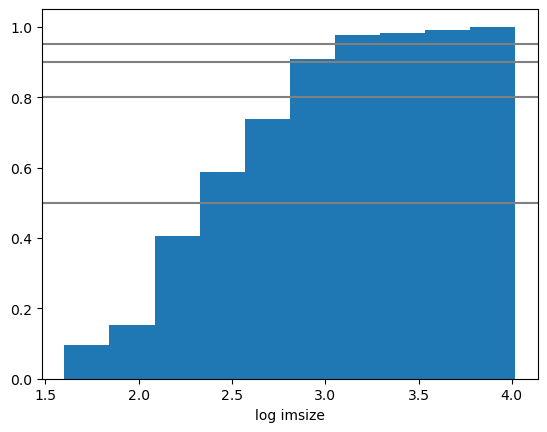

In [19]:
plt.hist(np.log10(cycle7_cycle8_tab['imsize']),cumulative=True,density=True)
plt.xlabel('log imsize')
plt.axhline(0.5,color='gray')
plt.axhline(0.8,color='gray')
plt.axhline(0.9,color='gray')
plt.axhline(0.95,color='gray')

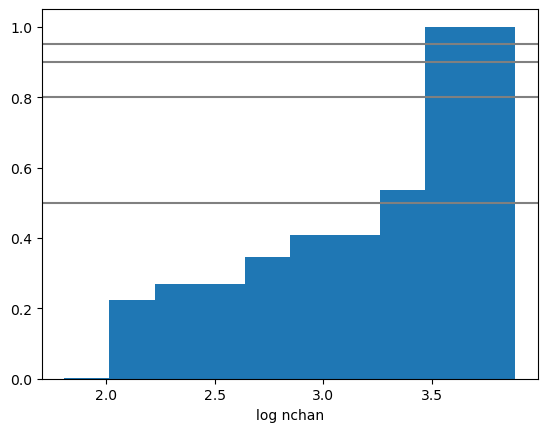

In [20]:
plt.hist(np.log10(cycle7_cycle8_tab['spw_nchan']),cumulative=True,density=True)
plt.xlabel('log nchan')
plt.axhline(0.5,color='gray')
plt.axhline(0.8,color='gray')
plt.axhline(0.9,color='gray')
plt.axhline(0.95,color='gray')

In [ ]:
np.log10(2000)

## Figuring out ncores and mitigation limit correspondance 

In [ ]:
import large_cubes

In [ ]:
reload(large_cubes)

In [ ]:
large_cubes.make_imsize_vs_nchan(result_c7_c8,core_theory=True,band2_specscan=False)

## Making density plots

In [ ]:
import large_cubes

In [ ]:
reload(large_cubes)

In [ ]:
log_imsize_range = (1.6,4.1)
log_imsize_step = 0.1
log_nchan_range = (1.7, 5.9)
log_nchan_step = 0.1

In [ ]:
reload(large_cubes)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab, 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels',
                                                            cmap='winter_r',
                                                            band2_specscan=False,
                                                            mit_limits=True,
                                                            pltname='density_plot_nolines.png')

In [ ]:
print("max is: ", np.nanmax(h_current))
print("min is : ", np.nanmin(h_current))

In [ ]:
reload(large_cubes)
large_cubes.calc_frac_under_lines(h_current,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

In [ ]:
reload(large_cubes)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW',
                                                            cmap='winter_r',
                                                            band2_specscan=False,nspw=10,
                                                            pltname='density_plot_wsu_spw_nolines.png')

In [ ]:
reload(large_cubes)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW',
                                                            cmap='winter_r', nspw=10,
                                                            pltname='density_plot_wsu_spw.png')

In [ ]:
print("max is : ", np.nanmax(h_wsu_spw))
print("min is : ", np.nanmin(h_wsu_spw))

In [ ]:
nspw=10
large_cubes.calc_frac_under_lines(h_wsu_spw,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step,
                                   max_nchans = np.array([large_cubes.band2specscan_160MBs['nchan']/nspw,large_cubes.band2specscan_500MBs['nchan']/nspw,large_cubes.band2specscan['nchan']/nspw]))

In [ ]:
reload(large_cubes)
h_wsu_initial, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_initial_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for Initial Correlated BW',
                                                            cmap='winter_r', nspw=1,
                                                            pltname='density_plot_wsu_initial.png')

In [ ]:
large_cubes.calc_frac_under_lines(h_wsu_initial,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

In [ ]:
h_wsu_final, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8, 
                                                            chan_type='wsu_nchan_final_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for Final 16GHz Correlated BW',
                                                            cmap='winter_r',nspw=1,
                                                            pltname='density_plot_wsu_final.png')

In [ ]:
reload(large_cubes)
large_cubes.calc_frac_under_lines(h_wsu_final,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step)

In [ ]:
large_cubes.calc_frac_under_lines(h_wsu_final,
                                  log_imsize_range = log_imsize_range, 
                                  log_imsize_step = log_imsize_step,
                                  log_nchan_range = log_nchan_range,
                                  log_nchan_step = log_nchan_step,
                                  mit_limits = np.array([1,10,100, 500]),
                                  max_nchans = np.array([large_cubes.band2specscan_160MBs['nchan'],large_cubes.band2specscan_500MBs['nchan'],large_cubes.band2specscan['nchan'],large_cubes.band2specscan['nchan']]))

## making cumulative fraction plots

In [ ]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h_current,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 Current',
                                 pltname='cumulative_current.png')

In [ ]:
reload(large_cubes)
large_cubes.calc_cumulative_hist(h_current,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 Current',
                                 pltname='cumulative_current_zoom.png',
                                 ylim=(0.9,1.0))

In [ ]:
large_cubes.calc_cumulative_hist(h_wsu_spw,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU 1.6GHz Correlated BW',
                                 pltname = 'cumulative_wsu_spw.png')

In [ ]:
large_cubes.calc_cumulative_hist(h_wsu_spw,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU 1.6GHz Correlated BW',
                                 pltname = 'cumulative_wsu_spw_zoom.png',
                                 ylim=(0.9,1.0))

In [ ]:
large_cubes.calc_cumulative_hist(h_wsu_initial,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8  WSU Initial Correlated BW',
                                pltname='cumulative_wsu_initial')

In [ ]:
large_cubes.calc_cumulative_hist(h_wsu_final,    
                                 mit_limits =  np.array([1,2,10,100,500]),
                                 log_imsize_range = log_imsize_range, 
                                 log_imsize_step = log_imsize_step,
                                 log_nchan_range = log_nchan_range,
                                 log_nchan_step = log_nchan_step,
                                 title = 'ALMA Cycle 7 & 8 WSU Final Correlated BW',
                                pltname='cumulative_wsu_final.png')

## Making velocity histograms

96277
[[5.9000e+01 2.7660e+03 2.8906e+04 4.8960e+03 7.0740e+03]
 [0.0000e+00 3.9000e+01 4.8000e+01 2.5080e+03 3.5880e+03]
 [1.2000e+01 1.3500e+02 2.4100e+02 1.1300e+02 7.1100e+02]
 [1.3940e+03 9.7330e+03 1.2183e+04 2.1550e+03 1.0158e+04]
 [3.0100e+02 1.6600e+03 2.0140e+03 7.1300e+02 3.2440e+03]
 [1.6000e+01 4.2000e+01 3.1200e+02 2.5100e+02 6.7900e+02]
 [0.0000e+00 6.6000e+01 6.0000e+01 2.8000e+01 1.0800e+02]
 [0.0000e+00 3.2000e+01 1.6000e+01 0.0000e+00 1.6000e+01]]


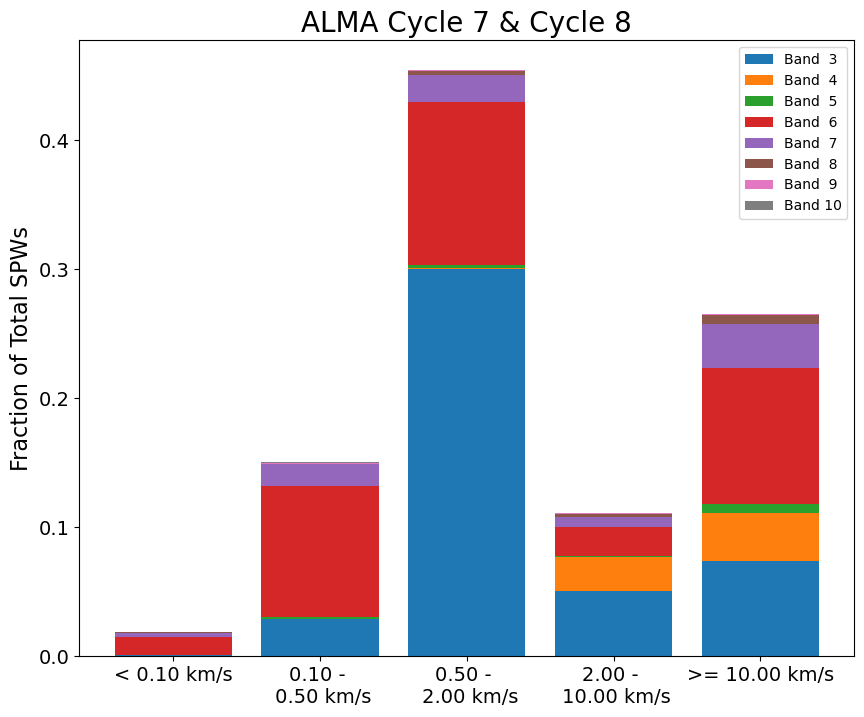

In [22]:
reload(wsu_plots)
vel_hist = wsu_plots.make_velocity_bar(cycle7_cycle8_tab,title='ALMA Cycle 7 & Cycle 8',
                                       pltname='plots/cycle7_cycle8_spw_distribution.png')

In [ ]:
np.sum(vel_hist,axis=0)/np.sum(vel_hist)

In [ ]:
reload(large_cubes)
idx = cycle7_cycle8_tab['velocity_resolution'] < 0.1
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n <0.1km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True, nspw=10,
                                                            pltname='density_plot_current_lt_01kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
reload(large_cubes)
idx = (cycle7_cycle8_tab['velocity_resolution'] < 0.5) & (cycle7_cycle8_tab['velocity_resolution'] >= 0.1)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 0.1 - 0.5 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_01_kms_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
reload(large_cubes)
idx = cycle7_cycle8_tab['velocity_resolution'] < 0.5
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n <0.5km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
idx = (cycle7_cycle8_tab['velocity_resolution'] >= 0.5) & (cycle7_cycle8_tab['velocity_resolution'] < 2.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 0.5 - 2 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_05kms_lt_2kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
idx = (cycle7_cycle8_tab['velocity_resolution'] >= 2.0) & (cycle7_cycle8_tab['velocity_resolution'] < 10.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n 2-10 km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_2kms_lt_10kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
idx =  (cycle7_cycle8_tab['velocity_resolution'] >= 10.0)
h_current, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(cycle7_cycle8_tab[idx], 
                                                            chan_type='spw_nchan',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Current Number of Channels \n >= 10km/s',
                                                            cmap='winter_r',
                                                            band2_specscan=True,nspw=10,
                                                            pltname='density_plot_current_gt_10kms.png',
                                                            vmin=1,
                                                            vmax=8970)

In [ ]:
reload(large_cubes)
idx = result_c7_c8['velocity_resolution_current'] < 0.1
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n < 0.1km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_01kms.png',
                                                            vmin=1,
                                                            vmax=1804)

In [ ]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] < 0.5) & (result_c7_c8['velocity_resolution_current'] >= 0.1)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 0.1-0.5 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_05kms_gt_01kms.png',
                                                            vmin=1,
                                                            vmax=1804)

In [ ]:
reload(large_cubes)
idx = result_c7_c8['velocity_resolution_current'] < 0.5
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n < 0.5km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_lt_05kms.png',
                                                            vmin=1,
                                                            vmax=1804)

In [ ]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 0.5) & (result_c7_c8['velocity_resolution_current'] < 2.0)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 0.5-2.0 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_gt_05kms_lt_2kms.png',
                                                            vmin=1,
                                                            vmax=1804)

In [ ]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 2) & (result_c7_c8['velocity_resolution_current'] < 10.0)
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n 2-10 km/s',
                                                            cmap='winter_r',
                                                            pltname='density_plot_wsu_spw_gt_2kms_lt_10kms.png',
                                                            vmin=1,
                                                            vmax=1804)

In [ ]:
reload(large_cubes)
idx = (result_c7_c8['velocity_resolution_current'] >= 10.0) 
h_wsu_spw, xedges, yedges = large_cubes.make_imsize_vs_nchan_hist2d(result_c7_c8[idx], 
                                                            chan_type='wsu_nchan_spw_stepped2',
                                                            log_imsize_range = log_imsize_range, 
                                                            log_imsize_step = log_imsize_step,
                                                            log_nchan_range = log_nchan_range,
                                                            log_nchan_step = log_nchan_step, 
                                                            title = 'Cycle 7 & 8 \n Number of Channels for 1.6GHz correlated BW \n >= 10 km/s',
                                                            cmap='winter_r',nspw=10,
                                                            pltname='density_plot_wsu_spw_gte_10kms.png',
                                                            vmin=1,
                                                            vmax=1804)

## Estimated the fraction of projects that would fail mitigation completely

In [ ]:
idx = (cycle7_cycle8_tab['spw_nchan'] > 3500) & (cycle7_cycle8_tab['points_per_fov'] > 5.8e5)
len(cycle7_cycle8_tab[idx])

In [ ]:
np.unique(cycle7_cycle8_tab[idx]['member_ous_uid'])

In [ ]:
idx = (cycle7_cycle8_tab['spw_nchan'] > 1900) & (cycle7_cycle8_tab['points_per_fov'] > 1.0e6)
len(cycle7_cycle8_tab[idx])

In [ ]:
np.unique(cycle7_cycle8_tab[idx]['member_ous_uid'])

In [ ]:
np.unique(cycle7_cycle8_tab['member_ous_uid'])

In [ ]:
(51+30)/5200.0

In [ ]:
cycle7_cycle8_tab.columns

In [ ]:
cycle7_cycle8_tab['is_mosaic']

In [ ]:
result_c7_c8.columns

In [ ]:
np.min(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

In [ ]:
np.max(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

In [ ]:
np.median(result_c7_c8['vis_rate_array_final_stepped2'])/3600.0

In [ ]:
result_c7_c8['vis_rate_array_final_stepped2']

In [ ]:
result_c7_c8['mous'][10]

In [ ]:
result_c7_c8[10]